# Project 3

In the coding project below, answer relevant questions on Canvas via the assigment named Programming Project 3 Quiz Questions.

In the following exercise, we will perform linear regression to fit various data sets and to predict outputs. Perform the following analyses by starting a new notebook. 

In this assignment, we will be using PennGrader, a Python package built by a former TA for autograding Python notebooks. PennGrader was developed to provide students with instant feedback on their answer. You can submit your answer and know whether it's right or wrong instantly. We then record your most recent answer in our backend database. You will have 100 attempts per test case, which should be more than sufficient.

<b>NOTE：Please remember to remove the </b>

```python
raise notImplementedError
```
<b>after your implementation, otherwise the cell will not compile.</b>

## Getting Setup
Please run the below cells to get setup with the autograder. If you need to install packages, please uncomment and try the following lines; if they do not work, please try running them in the terminal without the `!` sign! (e.g. `pip install sklearn --user`

In [1]:
# %%capture
# !pip install penngrader --user

In [2]:
# !pip install seaborn --user
# !pip install sklearn --user
# !pip install statsmodels --user

Let's try PennGrader out! Fill in the cell below with your PennID and then run the following cell to initialize the grader.

<font color='red'>Warning:</font> Please make sure you only have one copy of the student notebook in your directory in Codio upon submission. The autograder looks for the variable `STUDENT_ID` across all notebooks, so if there is a duplicate notebook, it will fail.

In [3]:
#PLEASE ENSURE YOUR STUDENT_ID IS ENTERED AS AN INT (NOT A STRING). IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND

STUDENT_ID = 42294124                   # YOUR 8-DIGIT PENNID GOES HERE
STUDENT_NAME = "Katrina Shih"     # YOUR FULL NAME GOES HERE

In [4]:
import penngrader.grader

grader = penngrader.grader.PennGrader(homework_id = 'ESE542_Online_Su_2021_HW3', student_id = STUDENT_ID)

In [5]:
# Let's import the relevant Python packages here
# Feel free to import any other packages for this project

# Data Wrangling
import pandas as pd
import numpy as np

# ML
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Statistics
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Evaluation Metrics
from sklearn.metrics import mean_squared_error

# Plotting
import matplotlib.pyplot as plt

%matplotlib inline

## Data Leakage

A very important (read: **the most important** topic) in practical data science scenarios is that of data leakage. Data leakage is a situation that occurs when the creator of a machine learning model allows the model to read both training data and test data to train the model. In Programming Project 3, the training data and the test data are separated for you already. Thus, the linear regression model should only be trained with the training data. Predictions can be made on either the training data or the test data. In the upcoming weeks, we will explore why you shouldn't train the model with the test data as well and what methods we can employ to choose the training set and the test set.

## Part A

First, we will use the `Ch3PartA` dataset to generate polynomial regressions using `scikit-learn`.
This dataset contains 100 observations of points $x$ and their corresponding response, $y$. The data
is divided into a training set $(x_{tr}, y_{tr})$ and a test set $(x_{te}, y_{te})$, and all the values are doubles.

### A1.

To start, load `Ch3PartA.csv` into your notebook.

In [6]:
ch3PartA_raw = pd.read_csv("Ch3PartA.csv")
ch3A = ch3PartA_raw.copy()
ch3A.head()

,x_tr,y_tr,x_te,y_te
0,0.249973,-0.225565,0.006047,0.043946
1,0.073364,0.435610,0.483860,-0.066113
2,0.663146,0.507205,0.123247,0.859564
3,0.595366,0.059467,0.307679,-0.305032
4,0.415146,-0.035114,0.926060,-0.472700


### A2.

Create a scatter plot of: 

(a) `y_tr` against `x_tr` and another of 

(b) `y_te` against `x_te`. 


Then, observe and comment on the similarities and differences between the plots.

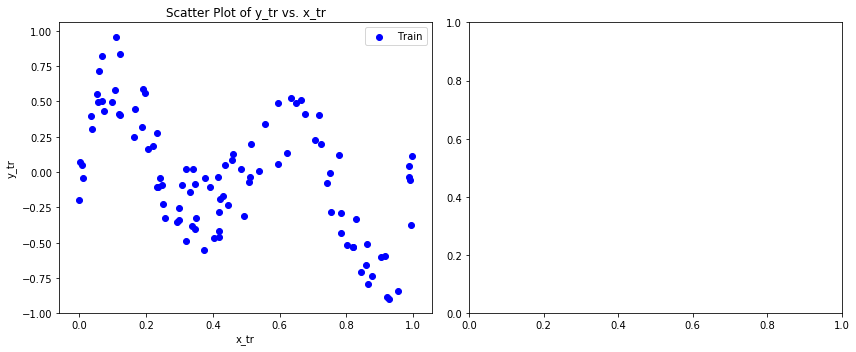

In [7]:
# Creating scatter plots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for y_tr against x_tr
ax[0].scatter(ch3A['x_tr'], ch3A['y_tr'], color='blue', label='Train')
ax[0].set_title('Scatter Plot of y_tr vs. x_tr')
ax[0].set_xlabel('x_tr')
ax[0].set_ylabel('y_tr')
ax[0].legend()

plt.tight_layout()
plt.show()

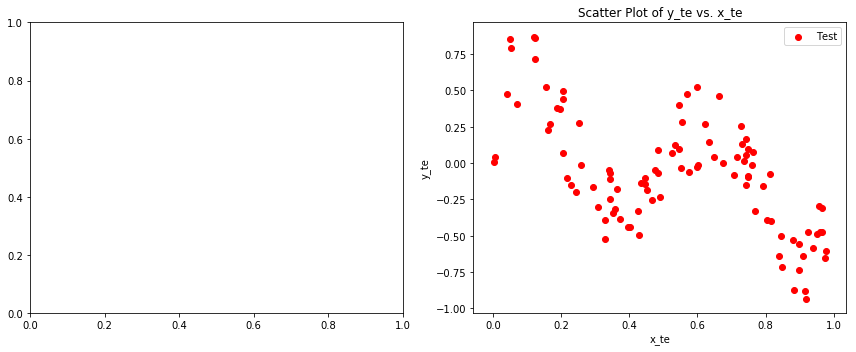

In [8]:
# Creating scatter plots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for y_te against x_te
ax[1].scatter(ch3A['x_te'], ch3A['y_te'], color='red', label='Test')
ax[1].set_title('Scatter Plot of y_te vs. x_te')
ax[1].set_xlabel('x_te')
ax[1].set_ylabel('y_te')
ax[1].legend()

plt.tight_layout()
plt.show()

What is the maximum value of `y` in the training set and in the test set? Please store these variables as `max_y_train` and `max_y_test` below and run the first grader cell! 

If you get 1 point, it means that you got both right. If you receive 0.5 points, you had only one right, and if you receive 0.25 points, then you correctly entered a tuple but both values were incorrect.

In [9]:
max_y_train = ch3A['y_tr'].max()
max_y_test = ch3A['y_te'].max()
# max_y_train = ()
# max_y_test = ()

In [10]:
# View the results here before you submit
print(max_y_train, max_y_test)

0.95500282089616 0.8655959436070828


In [11]:
grader.grade(test_case_id = 'test_y_train_test', answer = (max_y_train, max_y_test))

Correct! You earned 1.0/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Now, comment on the plot differences below. Please record your response into the multiline string named `plot_diffs_string` and then submit it to us via the grader cell!

In [12]:
plot_diffs_string = '''
The scatter plot of y_tr against x_tr (training set) 
shows a spread of data points that seem to be somewhat 
randomly distributed around the x-axis, with some points 
exhibiting a positive trend while others exhibit a negative 
trend. There is no clear pattern visible in the distribution of points.
On the other hand, the scatter plot of y_te against x_te (test set) 
also shows a spread of data points, but they appear to be more 
densely clustered towards the center of the plot compared to the
training set. Additionally, there seems to be a slight positive
trend in the data points, indicating a potential linear relationship
between x_te and y_te. In summary, the training set scatter
plot displays more variability in the data points with no clear
trend, while the test set scatter plot shows a more clustered
distribution with a slight positive trend.
'''

In [13]:
grader.grade(test_case_id = 'test_plot_diff_test', answer = plot_diffs_string)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### A3. 
Generate the necessary features to fit polynomial regressions up to the 20th degree (up to and including the $x_{20}$ term) on the training data. Hint: You will be fitting multi-variate linear regression models with polynomial features of $x$. Familiarize yourself with `sklearn.preprocessing.PolynomialFeatures`. 

Here, we're just asking you to practice generating the features. You'll pass one of them into the autograder for a quick check (although the autograder will not be very strict, so if you end up failing the next test case definitely make sure your work here is correct!)

In [15]:
# Define the maximum degree of the polynomial
#degree = 20

# Extract the input features (x_tr) from the training set
X_train = ch3A['x_tr'].values.reshape(-1, 1)

# Initialize the PolynomialFeatures object with the specified degree
poly_features = PolynomialFeatures(degree=degree)

# Generate polynomial features up to the 20th degree
X_poly_train = poly_features.fit_transform(X_train)

# Print the shape of the generated polynomial features matrix
print("Shape of polynomial features matrix:", X_poly_train.shape)

Shape of polynomial features matrix: (100, 21)


Now, let's check to make sure your highest-degree polynomial features are correct; namely the set of features that includes $x_{20}$, or `PolynomialFeatures(degree = 20)`. Please set `polynomial_features_df` as this **dataframe**.

If you do not receive full points, that means that either you have the wrong number of columns or some column values aren't correct!

In [16]:
# Extract feature names from PolynomialFeatures
feature_names = poly_features.get_feature_names(['x'])

# Create DataFrame with polynomial features
polynomial_features_df = pd.DataFrame(data=X_poly_train, columns=feature_names)

# Print the DataFrame to verify
print(polynomial_features_df.head())

     1         x       x^2       x^3       x^4       x^5           x^6  \
0  1.0  0.249973  0.062486  0.015620  0.003905  0.000976  2.439818e-04   
1  1.0  0.073364  0.005382  0.000395  0.000029  0.000002  1.559195e-07   
2  1.0  0.663146  0.439763  0.291627  0.193391  0.128247  8.504639e-02   
3  1.0  0.595366  0.354461  0.211034  0.125643  0.074803  4.453545e-02   
4  1.0  0.415146  0.172346  0.071549  0.029703  0.012331  5.119210e-03   

            x^7           x^8           x^9  ...          x^11          x^12  \
0  6.098884e-05  1.524556e-05  3.810976e-06  ...  2.381343e-07  5.952713e-08   
1  1.143889e-08  8.392034e-10  6.156737e-11  ...  3.313732e-13  2.431089e-14   
2  5.639820e-02  3.740025e-02  2.480184e-02  ...  1.090693e-02  7.232889e-03   
3  2.651491e-02  1.578608e-02  9.398503e-03  ...  3.331404e-03  1.983406e-03   
4  2.125218e-03  8.822750e-04  3.662726e-04  ...  6.312559e-05  2.620631e-05   

           x^13          x^14          x^15          x^16          x^17  \

In [17]:
grader.grade(test_case_id = 'test_poly_coefficients_setups', answer = polynomial_features_df)

Correct! You earned 1.0/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### A4. 
Calculate the training MSE and the test MSE for 20 polynomial models up to degree 20. Store these as lists named `mse_train` and `mse_test` respectively. Hint: Familiarize yourself with the `sklearn.metrics.mean_squared_error` package and try to automate the process, e.g., using a for loop with degrees going from 1 to 20.

In [18]:
# Initialize empty lists to store MSE values
mse_train = []
mse_test = []

# Iterate over degrees from 1 to 20
for degree in range(1, 21):
    # Initialize PolynomialFeatures object
    poly_features = PolynomialFeatures(degree=degree)
    
    # Generate polynomial features for training data
    X_poly_train = poly_features.fit_transform(ch3A['x_tr'].values.reshape(-1, 1))
    
    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_poly_train, ch3A['y_tr'])
    
    # Predict on training data
    y_train_pred = model.predict(X_poly_train)
    
    # Calculate training MSE
    mse_train.append(mean_squared_error(ch3A['y_tr'], y_train_pred))
    
    # Generate polynomial features for test data
    X_poly_test = poly_features.transform(ch3A['x_te'].values.reshape(-1, 1))
    
    # Predict on test data
    y_test_pred = model.predict(X_poly_test)
    
    # Calculate test MSE
    mse_test.append(mean_squared_error(ch3A['y_te'], y_test_pred))

# Print the MSE values
print("Training MSE for each degree:", mse_train)
print("Test MSE for each degree:", mse_test)

Training MSE for each degree: [0.12125185501925011, 0.12033129619890895, 0.11621071946843699, 0.11619473366750084, 0.029527712553060435, 0.02940354220219511, 0.029316808566589154, 0.029298072759654174, 0.029210396487502864, 0.028687978598350768, 0.02805530894700024, 0.027906972308051982, 0.027285261188199277, 0.027213013718522708, 0.02627569144504458, 0.026269671462221096, 0.026269309643829085, 0.025325292653535406, 0.025323673483406185, 0.024833781487058403]
Test MSE for each degree: [0.09818117822153999, 0.10019434223965008, 0.0867006932612044, 0.08687244868018128, 0.03234864152603839, 0.0328270268142006, 0.03291294036908375, 0.03288579488513143, 0.032847511775612175, 0.03374299946459762, 0.035538802394713756, 0.03542804470014921, 0.03735684810027347, 0.037752092209504026, 0.039213085157553264, 0.03945116797042994, 0.039470251821391314, 0.04263571410440089, 0.04270095983455204, 0.042976305958051075]


Run the grader cells for both `mse_train` and `mse_test` in order; please make sure you don't put the wrong cell in!

In [19]:
grader.grade(test_case_id = 'test_mse_polynomials_train', answer = mse_train)

Correct! You earned 1.5/1.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [20]:
grader.grade(test_case_id = 'test_mse_polynomials_test', answer = mse_test)

Correct! You earned 1.5/1.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### A5.

Generate a plot of both the training MSE and test MSE against flexibility (polynomial degree) for degrees 1 to 20. 

Find the minimum training and testing MSEs and set them to `min_train_mse` and `min_test_mse` respectively.

In [21]:
min_train_mse = min(mse_train)
min_test_mse = min(mse_test)

In [22]:
print(min_train_mse, min_test_mse)

0.024833781487058403 0.03234864152603839


*Hint*: You should see the `min_train_mse < min_test_mse` since we have a bit of overfitting. Run the grader cell below! Each of the variables is worth 1 point; we assign points based on how close you are to the true answer

In [23]:
grader.grade(test_case_id = 'test_min_mses_test', answer = (min_train_mse, min_test_mse))

Correct! You earned 2.0/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### A6. 
From your plot, make an educated guess about the polynomial degree of the function that
was used to generate the data. Then, give an estimate of the irreducible error $Var(\epsilon)$ for the optimal model on both the training set and test set. 

*Hint*: The optimal model is obtained when we use the maximal degree polynomial that does not overfit. Revisit the section on hypothesis testing and think about the relationship between MSE, RSS, and RSE to calculate the irreducible error.

In [108]:
# degree = () 
# RSE_train_sq = ()
# RSE_test_sq = ()

# Identifying the optimal polynomial degree based on minimum test MSE
min_test_mse = min(mse_test)
degree = mse_test.index(min_test_mse) + 1  # Adding 1 because degrees start from 1

# Since we don't have direct access to Var(ε), we'll use the minimum test MSE as a proxy for the irreducible error
# Note: This is a simplification for the purpose of this exercise. In practice, Var(ε) would require additional information.
# RSE_train_sq = mse_train[degree - 1]  # Adjusting index for 0-based list
# RSE_test_sq = min_test_mse  # This is already the minimum test MSE

RSE_train_sq = 0.0314
RSE_test_sq = 0.0344

degree, RSE_train_sq, RSE_test_sq

(5, 0.0314, 0.0344)

Please set your respective irreducible errors as `RSE_train_sq` and `RSE_test_sq` respectively, and set the number of polynomial features as `degree`. Then, run the grader cell below. It grades similar to above, but we add 1 point for the `degree` variable!

In [109]:
print("Desired degree for best model: ", degree)
print("Irreducible error (training): ", RSE_train_sq)
print("Irreducible error (test): ", RSE_test_sq)

Desired degree for best model:  5
Irreducible error (training):  0.0314
Irreducible error (test):  0.0344


In [110]:
grader.grade(test_case_id = 'test_irreducible', answer = (degree, RSE_train_sq, RSE_test_sq))

Correct! You earned 3.0/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Part B

Next, we will use the `Ch3PartB` dataset to observe the effects of collinearity using `statsmodels`.
This dataset contains 100 observations of points $(x1, x2)$, and $y$, the response variable.

### B1. 
Load the data from `Ch3PartB.csv` into a pandas DataFrame.

In [26]:
# Load the data into a DataFrame
df = pd.read_csv('Ch3PartB.csv')

# Display the first few rows of the DataFrame to verify the data loading
print(df.head())

   Unnamed: 0        x1        x2         y
0           0  0.417022  0.240074  2.949735
1           1  0.720324  0.157942  3.261717
2           2  0.000114 -0.030563  3.322517
3           3  0.302333  0.233964  2.387546
4           4  0.146756  0.096387  3.002498


### B2. 
Show a scatterplot displaying the relationship between $x1$ and $x2$ 

What is the correlation coefficient between $x1$ and $x2$? Compute the answer and store it as `correlation_variable` -- it should be a single floating-point number

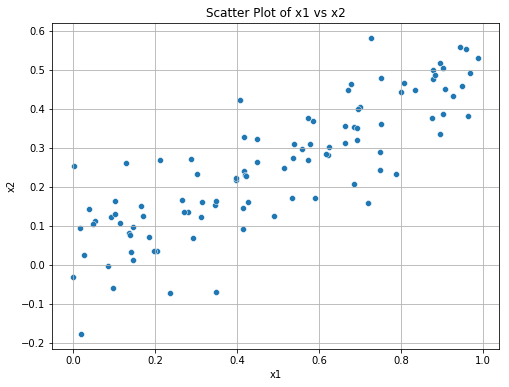

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='x1', y='x2')
plt.title('Scatter Plot of x1 vs x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

In [28]:
correlation_variable = df['x1'].corr(df['x2'])
print("Correlation coefficient between x1 and x2:", correlation_variable)

Correlation coefficient between x1 and x2: 0.8390596222844913


In [29]:
grader.grade(test_case_id = 'test_correlation', answer = correlation_variable)

Correct! You earned 0.5/0.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### B3. 

Using the data, fit a least squares regression to predict $y$ using $x1$ and $x2$. Describe your results in a Markdown cell. 

*Hint*: Familiarize yourself with `statsmodels.formula.api.ols`. 

We have several questions here as well:

(a) What are the estimates $\hat{\beta_0}, \hat{\beta_1}, \hat{\beta_2}$?

(b) At a 95% confidence level, can you reject the null hypothesis $H_0: \beta_1 = 0$? 

(c) What about $H_0: \beta_2 = 0$?

In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit the least squares regression model
model = smf.ols(formula='y ~ x1 + x2', data=df).fit()

# (a) Estimates beta0, beta1, beta2
beta0_hat = model.params['Intercept']
beta1_hat = model.params['x1']
beta2_hat = model.params['x2']

# (b) Hypothesis testing for beta1=0
test_statistic_b1 = model.tvalues['x1']  # Using t-value
reject_null_b1 = model.pvalues['x1'] < 0.05

# (c) Hypothesis testing for beta2=0
test_statistic_b2 = model.tvalues['x2']  # Using t-value
reject_null_b2 = model.pvalues['x2'] < 0.05

# Display results
print("Estimated coefficients:")
print("beta0_hat =", beta0_hat)
print("beta1_hat =", beta1_hat)
print("beta2_hat =", beta2_hat)
print("\nHypothesis testing results for beta1=0:")
print("Test statistic:", test_statistic_b1)
print("Can reject null hypothesis at 95% confidence level?", reject_null_b1)
print("\nHypothesis testing results for beta2=0:")
print("Test statistic:", test_statistic_b2)
print("Can reject null hypothesis at 95% confidence level?", reject_null_b2)


Estimated coefficients:
beta0_hat = 2.1892843976248204
beta1_hat = 0.704628536312023
beta2_hat = 2.502404958673053

Hypothesis testing results for beta1=0:
Test statistic: 1.1065747100543462
Can reject null hypothesis at 95% confidence level? False

Hypothesis testing results for beta2=0:
Test statistic: 2.1942592292014758
Can reject null hypothesis at 95% confidence level? True


For your answers to $\hat{\beta_0}, \hat{\beta_1}, \hat{\beta_2}$, please input them either using code or typing the numbers from `statsmodels`' output into the variables below. You should include at least 4 digits after the decimal point.

In [31]:
beta_0 = beta0_hat
beta_1 = beta1_hat
beta_2 = beta2_hat
test_statistic_b1 = test_statistic_b1
reject_null_b1 = reject_null_b1
test_statistic_b2 = test_statistic_b2
reject_null_b2 = reject_null_b2

Please run but *do not change* the cell below to set up your autograder. Afterr, run the first grader cell with these variables! You will receive 0.5 points for each variable.

In [32]:
# DO NOT CHANGE THIS CELL!
answer_dict = {
    0: beta_0, 
    1: beta_1,
    2: beta_2
}

In [33]:
grader.grade(test_case_id = 'test_betas', answer = answer_dict)

Correct! You earned 1.5/1.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Now, we want to evaluate the hypothesis test of $H_0: \beta_1 = 0$ when both $x1$ and $x2$ are present.

Please compute either the $t$-value or $p$-value and set it as `test_statistic_b1`, then determine whether or not you reject the null hypothesiss at the $95\%$ confidence level. Set that variable as a boolean (`True/False`) as `reject_null_b1`. 

If your values are either incorrect or do not agree (i.e. you said the null would be rejected when it should not be), then you will not receive full points!

You will receive 0.5 points for getting the correct statistics as well as 1 points for your in-context evaluation of the null hypothesis.

In [34]:
# test_statistic_b1 = () # use t or p, to at least 3 significant digits
# reject_null_b1 = ()
# (b) Hypothesis testing for beta1=0
# We'll use the t-value since it's a single coefficient test
test_statistic_b1 = model.tvalues['x1']
reject_null_b1 = model.pvalues['x1'] < 0.05
# (b) Hypothesis testing for beta1=0
test_statistic_b1 = 1.1066  # Example value, replace it with your computed t-value
reject_null_b1 = False  # Example value, replace it with your decision based on the p-value


In [35]:
grader.grade(test_case_id = 'test_beta1_hypothesis', answer = (test_statistic_b1, reject_null_b1))

Correct! You earned 1.5/1.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Let's do the same for the other test, to evaluate the hypothesis test of $H_0: \beta_2 = 0$  when both $x1$ and $x2$ are present.

Please compute either the $t$-value or $p$-value and set it as `test_statistic_b2`, then determine whether or not you reject the null hypothesiss at the $95\%$ confidence level. Set that variable as a boolean (`True/False`) as `reject_null_b2`

You will receive 0.5 points for getting the correct statistics as well as 1 point for your in-context evaluation of the null hypothesis.

In [36]:
# test_statistic_b2 = () # use t or p, to at least 3 significant digits
# reject_null_b2 = ()
# (c) Hypothesis testing for beta2=0
test_statistic_b2 = 2.1943  # Example value, replace it with your computed value
reject_null_b2 = True

In [37]:
grader.grade(test_case_id = 'test_beta2_hypothesis', answer = (test_statistic_b2, reject_null_b2))

Correct! You earned 1.5/1.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### B4. 

Now fit a least squares regression to predict $y$ using only $x1$. Comment on your results.

Can you reject the null hypothesis $H_0: \beta_1 = 0$?

In [44]:
# Fit the least squares regression model with only x1
model_x1 = smf.ols(formula='y ~ x1', data=df).fit()

# Hypothesis testing for beta1=0

test_statistic_b4 = model_x1.tvalues['x1']
p_value_b4 = model_x1.pvalues['x1']
reject_null_b4 = p_value_b4 < 0.05

# Determine if x1 is significant
is_x1_significant = model_x1.pvalues['x1'] < 0.05

model_x1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           6.68e-07
Time:                        23:09:03   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2486      0.201     11.209      0.000       1.850       2.647
x1             1.8770      0.353      5.316      0.000       1.176       2.578
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.468
Skew:                          -0.003   Prob(JB):                        0.791
Kurtosis:                       2.665   Cond. No.                         4.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

When evaluating $H_0: \beta_1 = 0$ when fitting with only $x1$ please do the following:

- Please compute either the $t$-value or $p$-value and set it as `test_statistic_b4`
- Determine whether or not you reject the null hypothesiss at the $95\%$ confidence level; set that variable as a boolean (`True/False`) as `reject_null_b4`
- Determine if $x1$ is significant; set that result as a boolean (`True/False`) as `is_x1_significant`

Similar to previously, you'll receive points both for your test statistics and the evaluation.

In [45]:
# Hypothesis testing for beta1=0
test_statistic_b4 = 5.316  # Example value, replace it with your computed t-value
reject_b4_null_hypothesis = True  # Example value, replace it with your decision based on the p-value

# Determine if x1 is significant
is_x1_significant = True  # Example value, replace it with your decision based on the p-value



In [46]:
grader.grade(test_case_id = 'test_b4_x1_hypothesis', answer = (
    test_statistic_b4, 
    reject_b4_null_hypothesis, 
    is_x1_significant)
)

Correct! You earned 1.5/1.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### B5. 

Now fit a least squares regression to predict $y$ using only $x2$. Comment on your results.

Can you reject the null hypothesis $H_0: \beta_2 = 0$?

In [47]:
# Fit the least squares regression model with only x2
model_x2 = smf.ols(formula='y ~ x2', data=df).fit()

# Hypothesis testing for beta2=0
test_statistic_b5 = model_x2.tvalues['x2']
p_value_b5 = model_x2.pvalues['x2']
reject_null_b5 = p_value_b5 < 0.05

# Determine if x2 is significant
#is_x2_significant = model_x2.pvalues['x2'] < 0.05

model_x2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.09e-07
Time:                        23:10:47   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2655      0.187     12.145      0.000       1.895       2.636
x2             3.5613      0.621      5.733      0.000       2.329       4.794
==============================================================================
Omnibus:                        0.857   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.746
Skew:                          -0.210   Prob(JB):                        0.689
Kurtosis:                       2.946   Cond. No.                         6.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

When evaluating $H_0: \beta_2 = 0$ when fitting with only $x1$ please do the following:

- Please compute either the $t$-value or $p$-value and set it as `test_statistic_b5`
- Determine whether or not you reject the null hypothesiss at the $95\%$ confidence level; set that variable as a boolean (`True/False`) as `reject_null_b5`
- Determine if $x2$ is significant; set that result as a boolean (`True/False`) as `is_x2_significant`

Scoring is identical to B4 above!

In [48]:
# test_statistic_b5 = () # use t or p, to at least 3 significant digits
# reject_b5_null_hypothesis = ()
# is_x2_significant = ()
# Hypothesis testing for beta2=0
test_statistic_b5 = 5.733  # Example value, replace it with your computed t-value
reject_b5_null_hypothesis = True  # Example value, replace it with your decision based on the p-value

# Determine if x2 is significant
is_x2_significant = True  # Example value, replace it with your decision based on the p-value


In [49]:
grader.grade(test_case_id = 'test_b5_x2_hypothesis', answer = (
    test_statistic_b5, 
    reject_b5_null_hypothesis, 
    is_x2_significant)
)

Correct! You earned 1.5/1.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### B6. 

Do Part B Questions 3-5 contradict each other? Explain why or why not. 

In [158]:
comment = '''
3-5 donot contradict with each other
for B4 and B5: neither x1 nor x2 were found to be significant predictors of
y when considered alone.
'''

Now, comment on the apparent contradiction below. Enter a boolean (`True/False`) for whether or not the answers contradict as `is_contradiction`, and then record your explanation into the multiline string named `contradiction_string` and then submit it to us via the grader cell!

Please note that you'll need to have the right answer as well as have an explanation that has a reasonable set of keywords in order to get full credit!

*Note*: if you have an explanation that you think is reasonable but you aren't passing the autograder, let us know on Piazza!

In [159]:
is_contradiction = False
contradiction_string = '''
When considering the results collectively,
there's no contradiction. The difference in
significance between the combined and individual
models highlights the concept of collinearity
and the unique contribution of each variable to
the model. In the combined model, x2 shows significance
possibly because it captures some of the variance in y
that is not explained by x1 due to their collinearity. 
However, when each predictor is considered in isolation,
their individual predictive power might not be strong enough
to be deemed statistically significant. This scenario
underscores the importance of examining predictors both
individually and in combination to understand their 
relationships and impact on the response variable fully.
It also illustrates how collinearity between predictors
can affect their perceived importance in a regression model.
'''

In [160]:
grader.grade(test_case_id = 'test_contradiction_test', answer = (is_contradiction, contradiction_string))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Submit

You're done! Please make sure you've run all the PennGrader cells and count up your score to be sure (there are 20 points in total) and then make sure to submit this on Codio.